# 1. Pré-processamento

## 1.1. Importação das bibliotecas

In [1]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster import hierarchy
from scipy.stats import pearsonr

## 1.2. Coleta de dados via API

Os dados foram extraídos da API do Banco Mundial (World Bank), utilizando a biblioteca `wbgapi`.

A biblioteca fornece acesso a um vasto conjunto de dados globais, com séries temporais que podem retroceder até 1960. Todos os dados são de acesso aberto e licenciados sob CC BY 4.0 (Creative Commons Atribuição).

Para esta análise, foram selecionados os 12 países sul-americanos e definido o período de 2000 a 2022, buscando dados voltados para indicadores sociais, econômicos, de saúde e educação.

In [2]:
paises = ['BRA', 'ARG', 'BOL', 'CHL', 'COL', 'ECU', 'PRY', 'PER', 'URY', 'VEN', 'GUY', 'SUR']
periodo = range(2000, 2023)
indicadores = {
    "SP.POP.TOTL": "População Total",
    "SP.DYN.LE00.IN": "Expectativa de Vida",
    "SH.DYN.MORT": "Mortalidade Infantil (por 1000)",
    "SP.ADO.TFRT": "Taxa de fertilidade na adolescência (nascimentos por 1.000 mulheres de 15 a 19 anos)",
    "SH.XPD.CHEX.GD.ZS": "Gastos com Saúde (% do PIB)",
    "SN.ITK.DEFC.ZS": "Prevalência de desnutrição (% da população)",
    "SL.UEM.TOTL.FE.ZS": "Desemprego Feminino (%)",
    "SL.UEM.TOTL.MA.ZS": "Desemprego Masculino (%)",
    "SI.POV.DDAY" : "Taxa de pobreza de US$ 3,00 por dia (%)",
    "EG.ELC.ACCS.ZS": "Acesso à eletricidade (% da população)",
    "SH.STA.BASS.ZS": "Acesso ao Saneamento Básico (%)",
    "SH.H2O.BASW.ZS": "Acesso à Água Potável (%)",
    "NY.GDP.PCAP.KD": "PIB per capita",
    "E.ADT.LITR.ZS": "Taxa de alfabetização, total de adultos (% de pessoas com 15 anos ou mais)",
    "TX.VAL.FUEL.ZS.UN": "Exportações de combustíveis",
    "per_allsp.cov_pop_tot": "Coverage of social protection and labor programs (% of population)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)"
}

df_data = wb.data.DataFrame(
    list(indicadores.keys()), 
    paises, 
    time=periodo,
    labels=True
)


df_data.head()

,,Country,Series,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,series,,,,,,,,,,,,,,,,,,,,,
SUR,SP.POP.TOTL,Suriname,"Population, total",476643.0,486560.0,496551.0,506414.0,513923.0,519313.0,524997.0,531016.0,...,569020.0,575373.0,581627.0,587757.0,593713.0,599513.0,605768.0,612317.0,617896.0,623164.0
GUY,SP.POP.TOTL,Guyana,"Population, total",764832.0,764477.0,763652.0,763101.0,762418.0,760914.0,758966.0,756861.0,...,750021.0,754229.0,758781.0,763548.0,768479.0,791556.0,807665.0,807481.0,815482.0,821637.0
VEN,SP.POP.TOTL,"Venezuela, RB","Population, total",24526708.0,24979922.0,25435671.0,25892703.0,26340838.0,26785804.0,27224686.0,27649363.0,...,29912198.0,30254079.0,30573972.0,30765720.0,30565323.0,29807592.0,28938098.0,28444077.0,28237826.0,28213017.0
URY,SP.POP.TOTL,Uruguay,"Population, total",3266206.0,3274251.0,3278867.0,3281186.0,3283148.0,3285771.0,3289506.0,3295153.0,...,3345337.0,3356334.0,3368017.0,3379283.0,3388438.0,3394534.0,3397206.0,3398968.0,3396695.0,3390913.0
PER,SP.POP.TOTL,Peru,"Population, total",26598331.0,26964601.0,27288217.0,27580490.0,27852190.0,28101180.0,28324491.0,28530699.0,...,29817919.0,30115826.0,30457600.0,30866494.0,31324637.0,31897584.0,32449303.0,32838579.0,33155882.0,33475438.0


## 1.3. Análise Estrutural dos Dados

Para verificar as dimensões do conjunto, os tipos de dados e o formato, inspecionamos o DataFrame com o uso de `.shape`, `.dtypes`e `.columns.tolist()`.

In [3]:
df_data.shape

(192, 25)

In [4]:
df_data.dtypes

Country     object
Series      object
YR2000     float64
YR2001     float64
YR2002     float64
YR2003     float64
YR2004     float64
YR2005     float64
YR2006     float64
YR2007     float64
YR2008     float64
YR2009     float64
YR2010     float64
YR2011     float64
YR2012     float64
YR2013     float64
YR2014     float64
YR2015     float64
YR2016     float64
YR2017     float64
YR2018     float64
YR2019     float64
YR2020     float64
YR2021     float64
YR2022     float64
dtype: object

In [5]:
df_data.columns.tolist()

['Country',
 'Series',
 'YR2000',
 'YR2001',
 'YR2002',
 'YR2003',
 'YR2004',
 'YR2005',
 'YR2006',
 'YR2007',
 'YR2008',
 'YR2009',
 'YR2010',
 'YR2011',
 'YR2012',
 'YR2013',
 'YR2014',
 'YR2015',
 'YR2016',
 'YR2017',
 'YR2018',
 'YR2019',
 'YR2020',
 'YR2021',
 'YR2022']

## 1.4. Transformação para o formato 'Tidy' (Melt e Pivot)

Os dados da API são obtidos em um formato wide onde cada ano é uma coluna, o que torna inadequado para análises, precisamos converter para o formato tidy através de duas etapas:

- melt: Todas as colunas de ano serão armazenas em uma coluna só, chamada Ano e os valores que as antigas colunas armazenavam serão mantidas em uma nova coluna chamada Valores.
- pivot: Após o melt a coluna Valores conterá dados misturados de nossos indicadores, o pivot irá separar cada um deles em novas colunas e preenchê-las com os dados armazenados na coluna Valores.

In [6]:
df_long = df_data.melt(
    id_vars=['Country', 'Series'],   
    var_name='Ano',
    value_name='Valor'
)

df_long['Ano'] = df_long['Ano'].str.replace('YR', '').astype(int)

In [7]:
df_long.dtypes

Country     object
Series      object
Ano          int64
Valor      float64
dtype: object

In [8]:
df_data = df_long.pivot_table(
    index=['Country', 'Ano'],
    columns='Series',
    values='Valor'
).reset_index()

## 1.5. Tabela pronta para análise:

In [9]:
df_data.head()

Series,Country,Ano,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Coverage of social protection and labor programs (% of population),Current health expenditure (% of GDP),Fuel exports (% of merchandise exports),GDP per capita (constant 2015 US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Prevalence of undernourishment (% of population),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)"
0,Argentina,2000,95.7,65.808,NaN,8.220011,17.624183,10631.650364,NaN,73.910,19.4,96.284026,87.666927,37213984.0,7.3,NaN,16.356,14.029
1,Argentina,2001,95.5,63.491,NaN,8.371799,17.027214,10051.944846,NaN,74.154,18.8,96.522820,88.135939,37624825.0,10.7,2.9,17.191,17.411
2,Argentina,2002,96.1,62.126,NaN,7.393312,17.006238,8861.561993,NaN,74.312,18.3,96.755469,88.603394,38029349.0,17.1,3.7,18.823,20.122
3,Argentina,2003,96.3,60.002,NaN,6.894516,17.083063,9545.531941,NaN,74.307,17.8,96.982417,89.069563,38424282.0,8.2,4.3,17.577,13.806
4,Argentina,2004,96.5,61.681,NaN,7.228683,16.000290,10302.446532,NaN,74.871,17.3,97.204346,89.535068,38815916.0,6.0,3.9,15.823,11.893


In [10]:
df_data.shape

(276, 18)

In [11]:
df_data.columns.tolist()

['Country',
 'Ano',
 'Access to electricity (% of population)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Coverage of social protection and labor programs (% of population)',
 'Current health expenditure (% of GDP)',
 'Fuel exports (% of merchandise exports)',
 'GDP per capita (constant 2015 US$)',
 'Inflation, consumer prices (annual %)',
 'Life expectancy at birth, total (years)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'People using at least basic drinking water services (% of population)',
 'People using at least basic sanitation services (% of population)',
 'Population, total',
 'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)',
 'Prevalence of undernourishment (% of population)',
 'Unemployment, female (% of female labor force) (modeled ILO estimate)',
 'Unemployment, male (% of male labor force) (modeled ILO estimate)']

In [12]:
df_data.dtypes

Series
Country                                                                   object
Ano                                                                        int64
Access to electricity (% of population)                                  float64
Adolescent fertility rate (births per 1,000 women ages 15-19)            float64
Coverage of social protection and labor programs (% of population)       float64
Current health expenditure (% of GDP)                                    float64
Fuel exports (% of merchandise exports)                                  float64
GDP per capita (constant 2015 US$)                                       float64
Inflation, consumer prices (annual %)                                    float64
Life expectancy at birth, total (years)                                  float64
Mortality rate, under-5 (per 1,000 live births)                          float64
People using at least basic drinking water services (% of population)    float64
People using at least

In [13]:
df_data.isna().sum()

Series
Country                                                                    0
Ano                                                                        0
Access to electricity (% of population)                                    0
Adolescent fertility rate (births per 1,000 women ages 15-19)              0
Coverage of social protection and labor programs (% of population)       159
Current health expenditure (% of GDP)                                     18
Fuel exports (% of merchandise exports)                                   11
GDP per capita (constant 2015 US$)                                        23
Inflation, consumer prices (annual %)                                     78
Life expectancy at birth, total (years)                                    0
Mortality rate, under-5 (per 1,000 live births)                            0
People using at least basic drinking water services (% of population)      6
People using at least basic sanitation services (% of population)    

## 1.6. Tratamento de Dados Faltantes

Inicialmente, uma primeira análise feita com `.isna().sum()` revelou dados faltantes em 7 dos 14 indicadores, com destaque para 'Poverty headcount' (85 valores ausentes) e 'GDP per capita' (23 valores ausentes).

Em seguida, inspecionando as linhas com dados nulos, notamos que alguns países, como a Venezuela, possuem dados inteiramente ausentes para certos indicadores (ex: 'GDP per capita' em todo o período).

Para tratar isso preservando ao máximo a integridade dos dados, a estratégia foi dividida em duas etapas:

1.  Interpolação Linear (por País): Primeiro, os dados foram ordenados por País e Ano. Em seguida, aplicamos uma interpolação linear (`.interpolate()`) agrupada por país. Este método é ideal para preencher lacunas dentro de uma série temporal (ex: um dado faltante de 2015 é estimado pela tendência linear entre 2014 e 2016 daquele país).

2.  Preenchimento pela Mediana (Geral): A interpolação não consegue preencher valores no início ou no fim da série (ou quando a série inteira está ausente, como o PIB da Venezuela). Os valores nulos restantes foram então preenchidos com a mediana geral da respectiva coluna. A mediana foi escolhida em vez da média por ser uma medida de tendência central mais robusta e menos sensível a outliers.

A verificação final confirma que os dados faltantes nessas colunas foram tratados com sucesso.

In [14]:
linhas_com_nan = df_data[df_data.isna().any(axis=1)]
linhas_com_nan

Series,Country,Ano,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Coverage of social protection and labor programs (% of population),Current health expenditure (% of GDP),Fuel exports (% of merchandise exports),GDP per capita (constant 2015 US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Prevalence of undernourishment (% of population),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)"
0,Argentina,2000,95.7,65.808,NaN,8.220011,17.624183,10631.650364,NaN,73.910,19.4,96.284026,87.666927,37213984.0,7.3,NaN,16.356,14.029
1,Argentina,2001,95.5,63.491,NaN,8.371799,17.027214,10051.944846,NaN,74.154,18.8,96.522820,88.135939,37624825.0,10.7,2.9,17.191,17.411
2,Argentina,2002,96.1,62.126,NaN,7.393312,17.006238,8861.561993,NaN,74.312,18.3,96.755469,88.603394,38029349.0,17.1,3.7,18.823,20.122
3,Argentina,2003,96.3,60.002,NaN,6.894516,17.083063,9545.531941,NaN,74.307,17.8,96.982417,89.069563,38424282.0,8.2,4.3,17.577,13.806
4,Argentina,2004,96.5,61.681,NaN,7.228683,16.000290,10302.446532,NaN,74.871,17.3,97.204346,89.535068,38815916.0,6.0,3.9,15.823,11.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,"Venezuela, RB",2018,99.9,75.503,NaN,2.416913,NaN,NaN,NaN,72.641,24.3,94.039990,96.214417,29807592.0,NaN,23.2,6.167,5.001
272,"Venezuela, RB",2019,99.8,74.487,NaN,2.185637,NaN,NaN,NaN,72.766,24.3,93.862896,96.759710,28938098.0,NaN,23.9,6.478,5.487
273,"Venezuela, RB",2020,99.9,73.750,NaN,4.116152,NaN,NaN,NaN,72.369,24.3,93.685801,96.986065,28444077.0,NaN,22.2,7.907,7.286
274,"Venezuela, RB",2021,100.0,73.384,NaN,4.102220,NaN,NaN,NaN,71.536,24.3,93.508706,97.002357,28237826.0,NaN,20.0,7.548,6.705


In [15]:
df_data.isnull().sum()

Series
Country                                                                    0
Ano                                                                        0
Access to electricity (% of population)                                    0
Adolescent fertility rate (births per 1,000 women ages 15-19)              0
Coverage of social protection and labor programs (% of population)       159
Current health expenditure (% of GDP)                                     18
Fuel exports (% of merchandise exports)                                   11
GDP per capita (constant 2015 US$)                                        23
Inflation, consumer prices (annual %)                                     78
Life expectancy at birth, total (years)                                    0
Mortality rate, under-5 (per 1,000 live births)                            0
People using at least basic drinking water services (% of population)      6
People using at least basic sanitation services (% of population)    

In [16]:
colunas_com_nulos = [
    'Coverage of social protection and labor programs (% of population)',
    'Current health expenditure (% of GDP)',
    'GDP per capita (constant 2015 US$)',
    'Inflation, consumer prices (annual %)',
    'People using at least basic drinking water services (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)',
    'Prevalence of undernourishment (% of population)',
    'Fuel exports (% of merchandise exports)',
]

#ordenando por país
df_data = df_data.sort_values(by=['Country', 'Ano'])

#agrupando por país e interpolando linearmente
for col in colunas_com_nulos:
    df_data[col] = df_data.groupby('Country')[col].transform(
        lambda x: x.interpolate(method='linear')
    )

In [17]:
#verificando nulos restantes
print(df_data[colunas_com_nulos].isna().sum())

Series
Coverage of social protection and labor programs (% of population)       117
Current health expenditure (% of GDP)                                     18
GDP per capita (constant 2015 US$)                                        23
Inflation, consumer prices (annual %)                                     70
People using at least basic drinking water services (% of population)      0
People using at least basic sanitation services (% of population)          0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)       48
Prevalence of undernourishment (% of population)                          12
Fuel exports (% of merchandise exports)                                    0
dtype: int64


In [18]:
#preenchendo os nulos restantes com a mediana da coluna
df_data[colunas_com_nulos] = df_data[colunas_com_nulos].apply(
    lambda x: x.fillna(x.median())
)

#ultima verificação
print(df_data[colunas_com_nulos].isna().sum())

Series
Coverage of social protection and labor programs (% of population)       0
Current health expenditure (% of GDP)                                    0
GDP per capita (constant 2015 US$)                                       0
Inflation, consumer prices (annual %)                                    0
People using at least basic drinking water services (% of population)    0
People using at least basic sanitation services (% of population)        0
Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)      0
Prevalence of undernourishment (% of population)                         0
Fuel exports (% of merchandise exports)                                  0
dtype: int64


## 1.7. Ultima verificação

Para garantir que todos os dados faltantes foram tratados damos um `isnull().sum()` uma última vez.

In [19]:
df_data.isnull().sum()

Series
Country                                                                  0
Ano                                                                      0
Access to electricity (% of population)                                  0
Adolescent fertility rate (births per 1,000 women ages 15-19)            0
Coverage of social protection and labor programs (% of population)       0
Current health expenditure (% of GDP)                                    0
Fuel exports (% of merchandise exports)                                  0
GDP per capita (constant 2015 US$)                                       0
Inflation, consumer prices (annual %)                                    0
Life expectancy at birth, total (years)                                  0
Mortality rate, under-5 (per 1,000 live births)                          0
People using at least basic drinking water services (% of population)    0
People using at least basic sanitation services (% of population)        0
Population, total 

# 2. Análise Exploratória dos Dados (EDA)

Com o dataset limpo e ordenado, iniciaremos a análise exploratória, com o objetivo de sintetizar através de estatísticas e visualizações simples os atributos do conjunto de dados:

- Entender suas distribuições
- Identificar relações temporais
- Identificar correlações.

Ou seja, entender de forma profunda os dados que estamos utilizando.

## 2.1. Estatísticas Descritivas

Utilizando o `.describe()`, analisamos as estatísticas centrais do nosso conjunto de dados já limpo.

Nossa principal observação é a grande discrepância no indicador 'Fuel exports (% of merchandise exports)' (Exportações de combustíveis). A média (25.1%) é mais que o dobro da mediana (10.6%).

Isso indica uma forte assimetria nos dados: a maioria das observações (país/ano) tem uma baixa dependência de exportação de combustível, enquanto alguns valores muito altos (outliers, como Venezuela ou Equador) puxam a média drasticamente para cima. Nesses casos, a mediana se torna uma métrica mais confiável para representar o centro dos dados.

Observa-se também uma assimetria, embora menor, em 'GDP per capita' (média 7532 vs. mediana 6316) e 'Poverty headcount' (média 8.3 vs. mediana 7.4), sugerindo que a distribuição da riqueza e da pobreza não é uniforme entre os países analisados.

In [20]:
df_data.describe()

Series,Ano,Access to electricity (% of population),"Adolescent fertility rate (births per 1,000 women ages 15-19)",Coverage of social protection and labor programs (% of population),Current health expenditure (% of GDP),Fuel exports (% of merchandise exports),GDP per capita (constant 2015 US$),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Prevalence of undernourishment (% of population),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)"
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,2.760000e+02,276.000000,276.000000,276.000000,276.000000
mean,2011.000000,94.678623,69.125308,60.390845,6.628094,25.177720,7532.931498,14.342776,72.678598,21.851449,93.668054,83.333718,3.273924e+07,8.353986,8.073913,10.003971,6.801054
std,6.645299,7.346382,17.455490,17.471404,1.816317,28.276625,3747.166626,41.091103,4.197827,11.336741,5.108861,13.180793,5.110727e+07,6.503842,6.349056,4.673695,3.226744
min,2000.000000,64.000000,7.687000,14.523409,2.185637,0.000000,2013.845811,-1.001734,61.427000,6.700000,76.236219,34.881187,4.766430e+05,0.100000,2.500000,2.614000,1.386000
25%,2005.000000,94.350000,59.787500,54.146303,5.020139,2.616744,4897.025390,3.487836,70.379500,14.875000,90.945347,77.989466,4.675393e+06,4.075000,3.100000,5.944000,4.289750
50%,2011.000000,97.450000,70.767000,63.023895,6.677528,10.658885,6316.070678,4.838009,73.133500,19.200000,94.891357,86.603589,1.650717e+07,7.450000,6.200000,9.653500,6.340000
75%,2017.000000,99.325000,81.015500,66.242312,8.014109,43.100301,9244.047860,7.079111,75.829000,26.625000,97.538764,93.066278,3.441007e+07,9.725000,10.100000,13.708000,8.742000
max,2022.000000,100.000000,105.829000,97.987079,10.450306,98.763731,18228.355844,254.948535,80.610000,75.700000,100.000000,100.000000,2.103064e+08,34.100000,27.500000,25.146000,20.122000


## 2.2. Distribuição dos atributos e verificação de outliers

Para entender como certos dados se distribuem visualmente entre países, utilizamos de gráficos box plot.

### 2.2.1. Distribuição do PIB per capita

O boxplot abaixo nos permite analisar a distribuição do PIB per capita por país entre 2000 e 2022.

A visualização destaca uma clara desigualdade regional:
* Países de Renda Mais Alta: Chile, Uruguai e Argentina apresentam medianas consistentemente mais elevadas.
* Países de Renda Mais Baixa: A Bolívia se destaca com a menor mediana entre os países.
* Anomalia (Outliers): O que mais chama a atenção são os outliers da Guiana, que mostram valores recentes muito acima da sua própria distribuição histórica.

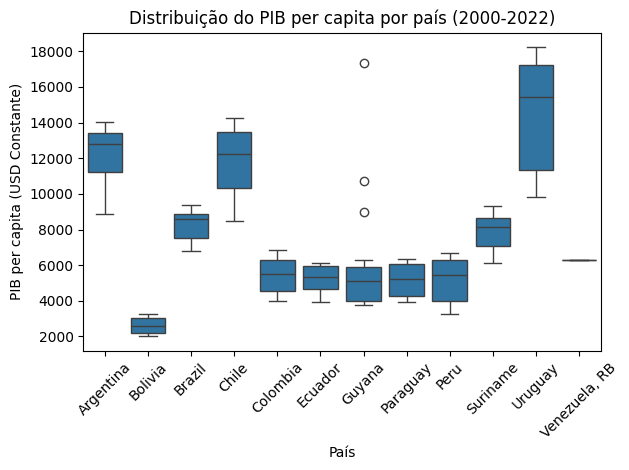

In [21]:
ax1 = sns.boxplot(data=df_data, x='Country', y='GDP per capita (constant 2015 US$)')

ax1.set_title('Distribuição do PIB per capita por país (2000-2022)')
ax1.set_xlabel('País')
ax1.set_ylabel('PIB per capita (USD Constante)')
ax1.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../../reports/figures/boxplot_pib.png', bbox_inches='tight')
plt.show()

### 2.2.2. Distribuição das Exportações de Combustíveis

Este gráfico revela uma clara divisão de grupos na economia sul-americana:

* Países Dependentes: Colômbia e Equador mostram uma alta dependência, com exportações de combustíveis historicamente representando mais de 40% do total.
* Países Não Dependentes: Brasil, Peru e Uruguai têm medianas baixas, geralmente abaixo de 20%.
* Anomalia (Outliers): A Guiana novamente apresenta um comportamento atípico. Sua distribuição histórica é quase nula (próxima de 0%), mas o gráfico mostra outliers recentes que disparam para mais de 80% das exportações.

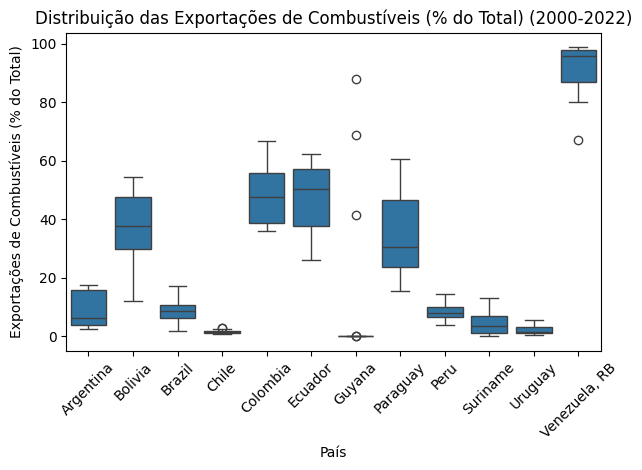

In [22]:
ax2 = sns.boxplot(data=df_data, x='Country', y='Fuel exports (% of merchandise exports)')

ax2.set_title('Distribuição das Exportações de Combustíveis (% do Total) (2000-2022)')
ax2.set_xlabel('País')
ax2.set_ylabel('Exportações de Combustíveis (% do Total)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../../reports/figures/boxplot_exportacao.png', bbox_inches='tight')
plt.show()

### 2.2.3. Distribuição dos Gastos com Saúde

Este gráfico compara o investimento nacional em saúde como uma porcentagem do PIB de cada país.

* Maiores Investimentos: Argentina, Brasil e Uruguai se destacam, com medianas de gastos consistentemente acima de 8% do PIB.
* Menores Investimentos: Guiana e Paraguai apresentam as medianas mais baixas da região.
* Anomalias (outliers): O gráfico revela instabilidades em alguns países:
    * Venezuela: Exibe múltiplos outliers baixos, indicando anos de forte queda no investimento, chegando a valores próximos de 2%.
    * Guiana, Peru e Suriname: Apresentam outliers altos, mostrando anos pontuais onde o investimento em saúde foi significativamente maior do que a sua mediana histórica.

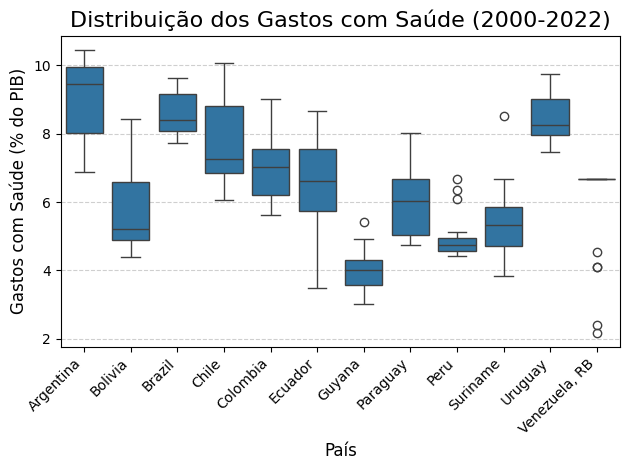

In [23]:
sns.boxplot(
    data=df_data, 
    x='Country', 
    y='Current health expenditure (% of GDP)'
)
plt.title('Distribuição dos Gastos com Saúde (2000-2022)', fontsize=16)
plt.ylabel('Gastos com Saúde (% do PIB)', fontsize=12)
plt.xlabel('País', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()
plt.savefig('../../reports/figures/boxplot_gastos_saude.png', bbox_inches='tight')
plt.show()

### 2.2.4. Distribuição da Mortalidade Intantil

Este boxplot ilustra a variação na taxa de mortalidade infantil (mortes por 1.000 nascidos vivos) entre os países.

* Taxa Mais Alta: A Bolívia apresenta a mediana mais elevada e, notavelmente, a maior variabilidade (a caixa e os "bigodes" são muito longos), indo de mais de 70 a cerca de 25.
* Taxas Mais Baixas: Chile e Uruguai demonstram as taxas mais baixas e estáveis, com medianas próximas de 10.
* Tendência de Melhoria: A grande variabilidade e as caudas longas na maioria dos países (como Bolívia, Guiana e Peru) indicam uma forte tendência de redução da mortalidade infantil ao longo das duas décadas analisadas.

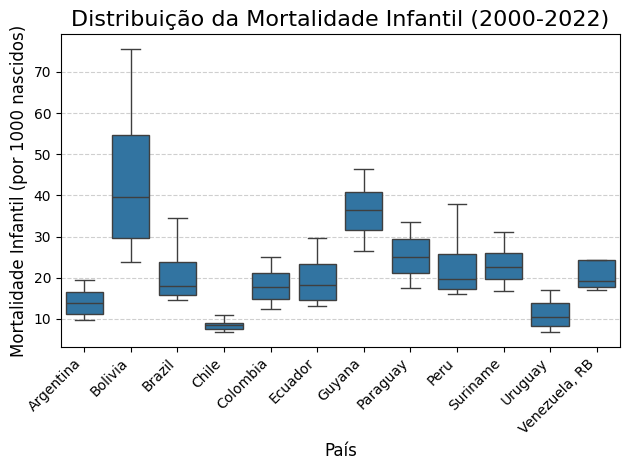

In [24]:
sns.boxplot(
    data=df_data, 
    x='Country', 
    y='Mortality rate, under-5 (per 1,000 live births)'
)
plt.title('Distribuição da Mortalidade Infantil (2000-2022)', fontsize=16)
plt.ylabel('Mortalidade Infantil (por 1000 nascidos)', fontsize=12)
plt.xlabel('País', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6, axis='y')
plt.tight_layout()
plt.savefig('../../reports/figures/boxplot_mortalidade.png', bbox_inches='tight')
plt.show()

## 2.3. Criação de Features (Features Engineering)

Para aprofundar a análise, foram criadas novas colunas (features) a partir dos dados existentes. O objetivo do *feature engineering* é derivar variáveis que nos ajudem a descobrir novos padrões.

### 2.3.1. Feature de Década

Criamos uma coluna categórica `Década` a partir da coluna `Ano`. Isso nos permitirá agrupar os dados e comparar o comportamento médio dos indicadores em períodos de tempo mais amplos (ex: anos 2000 vs. anos 2010), facilitando a identificação de mudanças estruturais ou tendências de longo prazo na região.

In [25]:
df_data['Decada'] = (df_data['Ano'] // 10) * 10
df_data['Decada']

0      2000
1      2000
2      2000
3      2000
4      2000
       ... 
271    2010
272    2010
273    2020
274    2020
275    2020
Name: Decada, Length: 276, dtype: int64

### 2.3.2. Feature de Cescimento do PIB per capita (ano a ano)

Enquanto o valor absoluto do 'PIB per capita' mostra o nível de riqueza, a sua taxa de variação anual é um indicador muito mais claro de aceleração ou desaceleração econômica. Esta feature foi criada calculando a variação percentual (`.pct_change()`) do PIB para cada país. Isso nos ajudará a identificar exatamente quais países tiveram os picos de crescimento mais significativos e em que anos isso ocorreu.

In [26]:
# ordena os dados para garantir que o cálculo seja feito na ordem correta dos anos
df_data.sort_values(by=['Country', 'Ano'])

# .pct_change() calcula a mudança percentual em relação à linha anterior
df_data['Crescimento_PIB_pc'] = df_data.groupby('Country')['GDP per capita (constant 2015 US$)'].pct_change() * 100

In [27]:
df_data[['Country', 'Ano', 'Decada', 'GDP per capita (constant 2015 US$)', 'Crescimento_PIB_pc']].tail()

Series,Country,Ano,Decada,GDP per capita (constant 2015 US$),Crescimento_PIB_pc
271,"Venezuela, RB",2018,2010,6316.070678,0.0
272,"Venezuela, RB",2019,2010,6316.070678,0.0
273,"Venezuela, RB",2020,2020,6316.070678,0.0
274,"Venezuela, RB",2021,2020,6316.070678,0.0
275,"Venezuela, RB",2022,2020,6316.070678,0.0


## 2.4. Mapeando nomes de colunas

Para facilitar em algumas visualizações, mapeamos os nomes das colunas para suas versões mais compactas e em português.

In [28]:
mapa_nomes = {
    'Country': 'País',
    'Access to electricity (% of population)': 'Acesso à Eletricidade',
    'Adolescent fertility rate (births per 1,000 women ages 15-19)': 'Fertilidade Adolescente',
    'Current health expenditure (% of GDP)': 'Gasto com Saúde (% PIB)',
    'Fuel exports (% of merchandise exports)': 'Exportação de Combustível (%)',
    'GDP per capita (constant 2015 US$)': 'PIB per capita',
    'Life expectancy at birth, total (years)': 'Expectativa de Vida',
    'Mortality rate, under-5 (per 1,000 live births)': 'Mortalidade Infantil',
    'People using at least basic drinking water services (% of population)': 'Acesso à Água Potável',
    'People using at least basic sanitation services (% of population)': 'Acesso ao Saneamento Básico',
    'Population, total': 'População Total',
    'Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population)': 'Taxa de Pobreza (US$3/dia)',
    'Prevalence of undernourishment (% of population)': 'Prevalência de Desnutrição',
    'Unemployment, female (% of female labor force) (modeled ILO estimate)': 'Desemprego Feminino',
    'Unemployment, male (% of male labor force) (modeled ILO estimate)': 'Desemprego Masculino',
    'Coverage of social protection and labor programs (% of population)': 'População beneficiada por programas de proteção social (%)',
    'Inflation, consumer prices (annual %)': 'Inflação (% anual)'
}

df_data = df_data.rename(columns=mapa_nomes)

## 2.5. Relação Temporal

Após analisar as distribuições, nosso próximo passo é investigar como os números evoluíram ao passar dos anos, de 2000 a 2022. Identificando padrão de crescimento, tendências e anomalias cronológicas.

* Evolução do PIB per capita (Heatmap): Utilizaremos um heatmap para termos uma visão geral de todo o dataset. O mapa de calor revela um clareamento gradual na maioria dos países, indicando um crescimento econômico. Mais uma vez, a Guiana nos chama a atenção saindo de pontos extremamente frios para quentes.
* Evolução do PIB per capita (Gráfico de facetas): Para termos mais informação de forma independentes sobre esses países, iremos criar um gráfico de faceta, que basicamente são gráficos de linha, porém, para cada um dos países. O gráfico reforça o crescimento econômicos dos países e a anomalia da Guiana, saindo de uma linha estável para uma trajetória praticamente vertical nos seus últimos anos.
* Evolução das exportações de combustíveis: Esse gráfico reforça a divisão de grupos que fizemos anteriormente, os países não dependentes possuem linhas que se mantêm planas e consistentes. Enquanto os países dependentes apresentam linhas em níveis maiores e com flutuações. Voltando os olhos a Guiana, o seu gráfico espelha de forma praticamente idêntica ao de PIB per capita, onde de repente sua linha dispara verticalmente, exatamente no mesmo período.

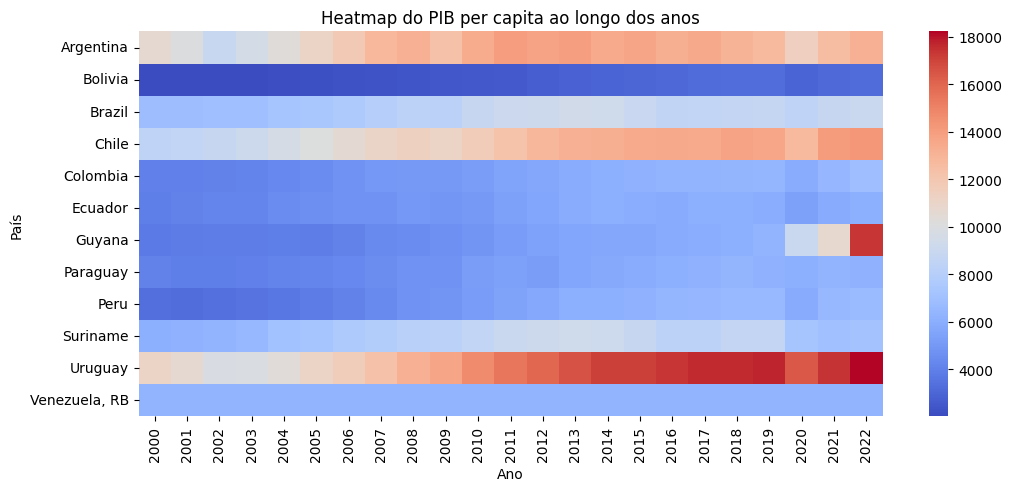

In [29]:
df_pivot = df_data.pivot(index='País', columns='Ano', values='PIB per capita')
plt.figure(figsize=(12, 5))
sns.heatmap(df_pivot, cmap='coolwarm')
plt.title('Heatmap do PIB per capita ao longo dos anos')
plt.show()

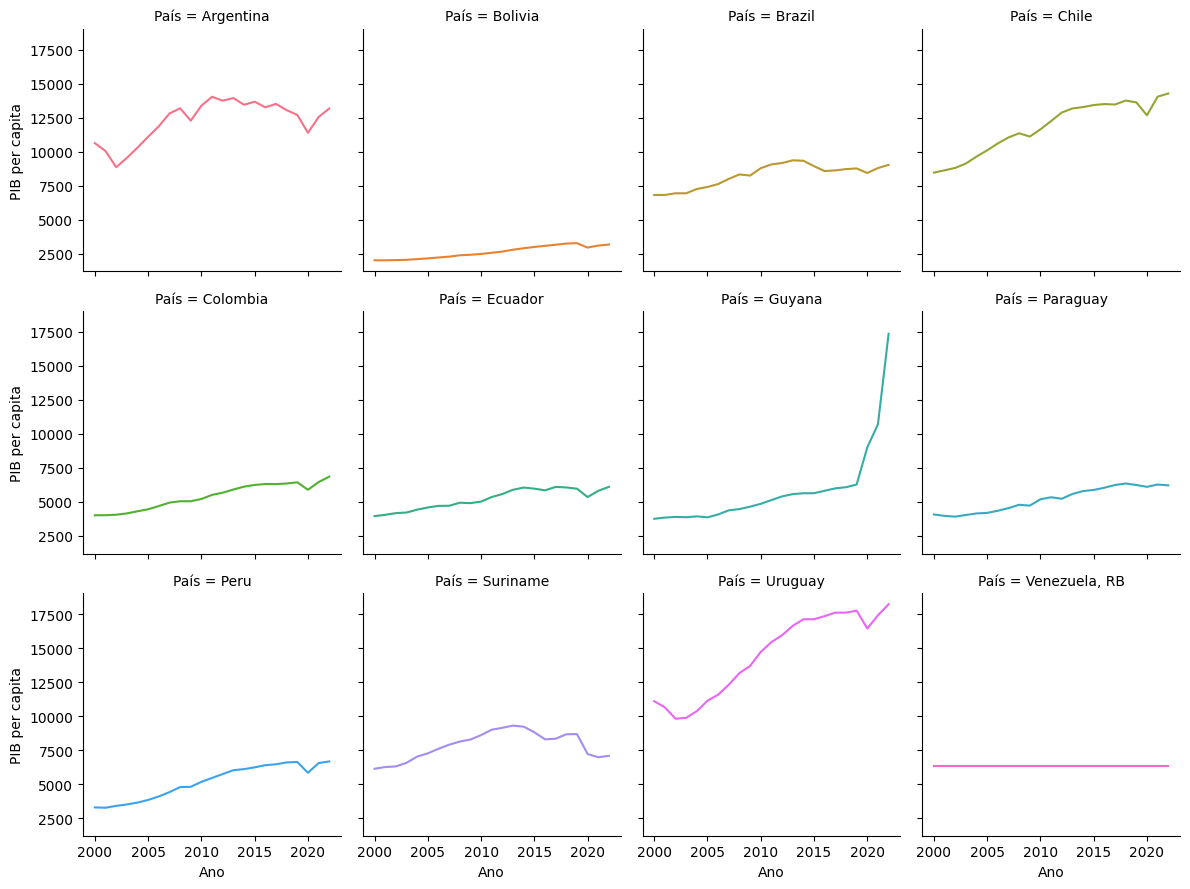

In [30]:
# Para evitar poluição do gráfico de linhas por conta do grande número de países, iremos utilizar o .relplot que criará um mini gráfico para cada um dos países.
sns.relplot(
    data=df_data,
    x='Ano', 
    y='PIB per capita',
    hue='País',
    kind='line',
    
    col='País', # Cria gráficos para cada país
    col_wrap=4, # Quebra de linha a cada 4 gráficos
    height=3, # Altura de cada mini-gráfico
    legend=False
)
plt.show()

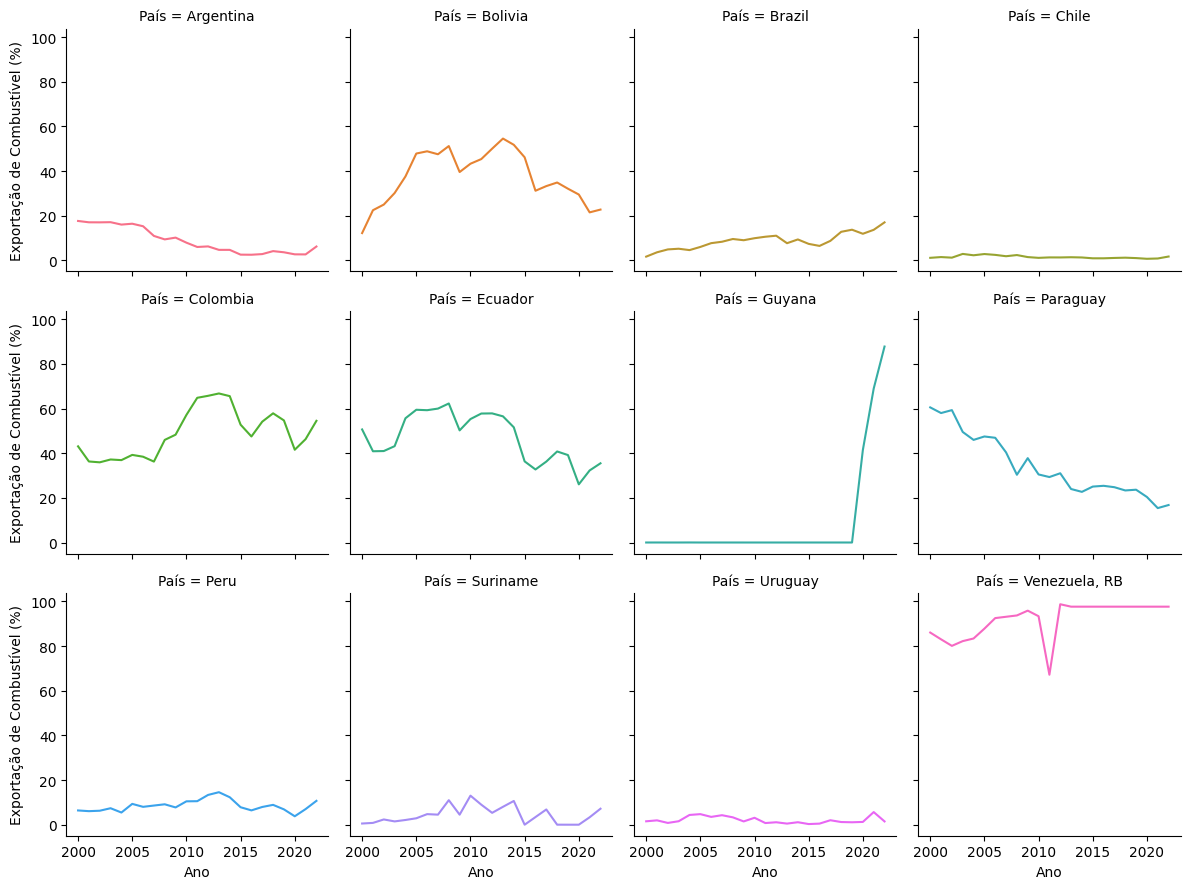

In [31]:
# Para evitar poluição do gráfico de linhas por conta do grande número de países, iremos utilizar o .relplot que criará um mini gráfico para cada um dos países.
sns.relplot(
    data=df_data,
    x='Ano', 
    y='Exportação de Combustível (%)',
    hue='País',
    kind='line',
    
    col='País', # Cria gráficos para cada país
    col_wrap=4, # Quebra de linha a cada 4 gráficos
    height=3, # Altura de cada mini-gráfico
    legend=False
)

plt.show()

g = sns.relplot(
    data=df_data,
    x='Ano',
    y='Taxa de Pobreza (US$3/dia)',
    hue='País',       
    col='País',          
    col_wrap=4,           
    kind='line',
    height=2.5,
    aspect=1,
    legend= False
)

g.fig.suptitle('Taxa de pobreza na América do Sul (2012-2022)', y=1.03) , g.set_axis_labels('Ano', 'Taxa de pobreza (%)'), g.set_titles('{col_name}')   

for ax in g.axes.flat:
    ax.grid(True)
    
    plt.tight_layout()
plt.savefig('../../reports/figures/taxa_de_pobreza_por_pais.png', bbox_inches='tight')
plt.show()

## 2.6. Heatmap de Correlação entre Indicadores

Após analisar os indicadores individualmente e criar novas *features*, o próximo passo é entender como eles se relacionam entre si. A melhor ferramenta para visualizar isso é um heatmap (mapa de calor) de correlação.

Este gráfico calcula o coeficiente de correlação de Pearson (que varia de -1 a +1) entre cada par de variáveis no nosso dataset.

* Vermelho forte (ex.: > 0,7): Indicam uma forte correlação positiva. Quando um indicador sobe, o outro tende a subir também.
* Azul forte (ex.: < -0,7): Indicam uma forte correlação negativa. Quando um indicador sobe, o outro tende a descer.
* Valores Próximos de 0 (Cores claras): Indicam baixa ou nenhuma correlação linear entre os indicadores.

O objetivo é identificar relações fortes (positivas ou negativas) que possam revelar padrões socioeconômicos ou confirmar hipóteses, como a relação que já suspeitamos entre "Exportações de Combustíveis" e "PIB per capita".

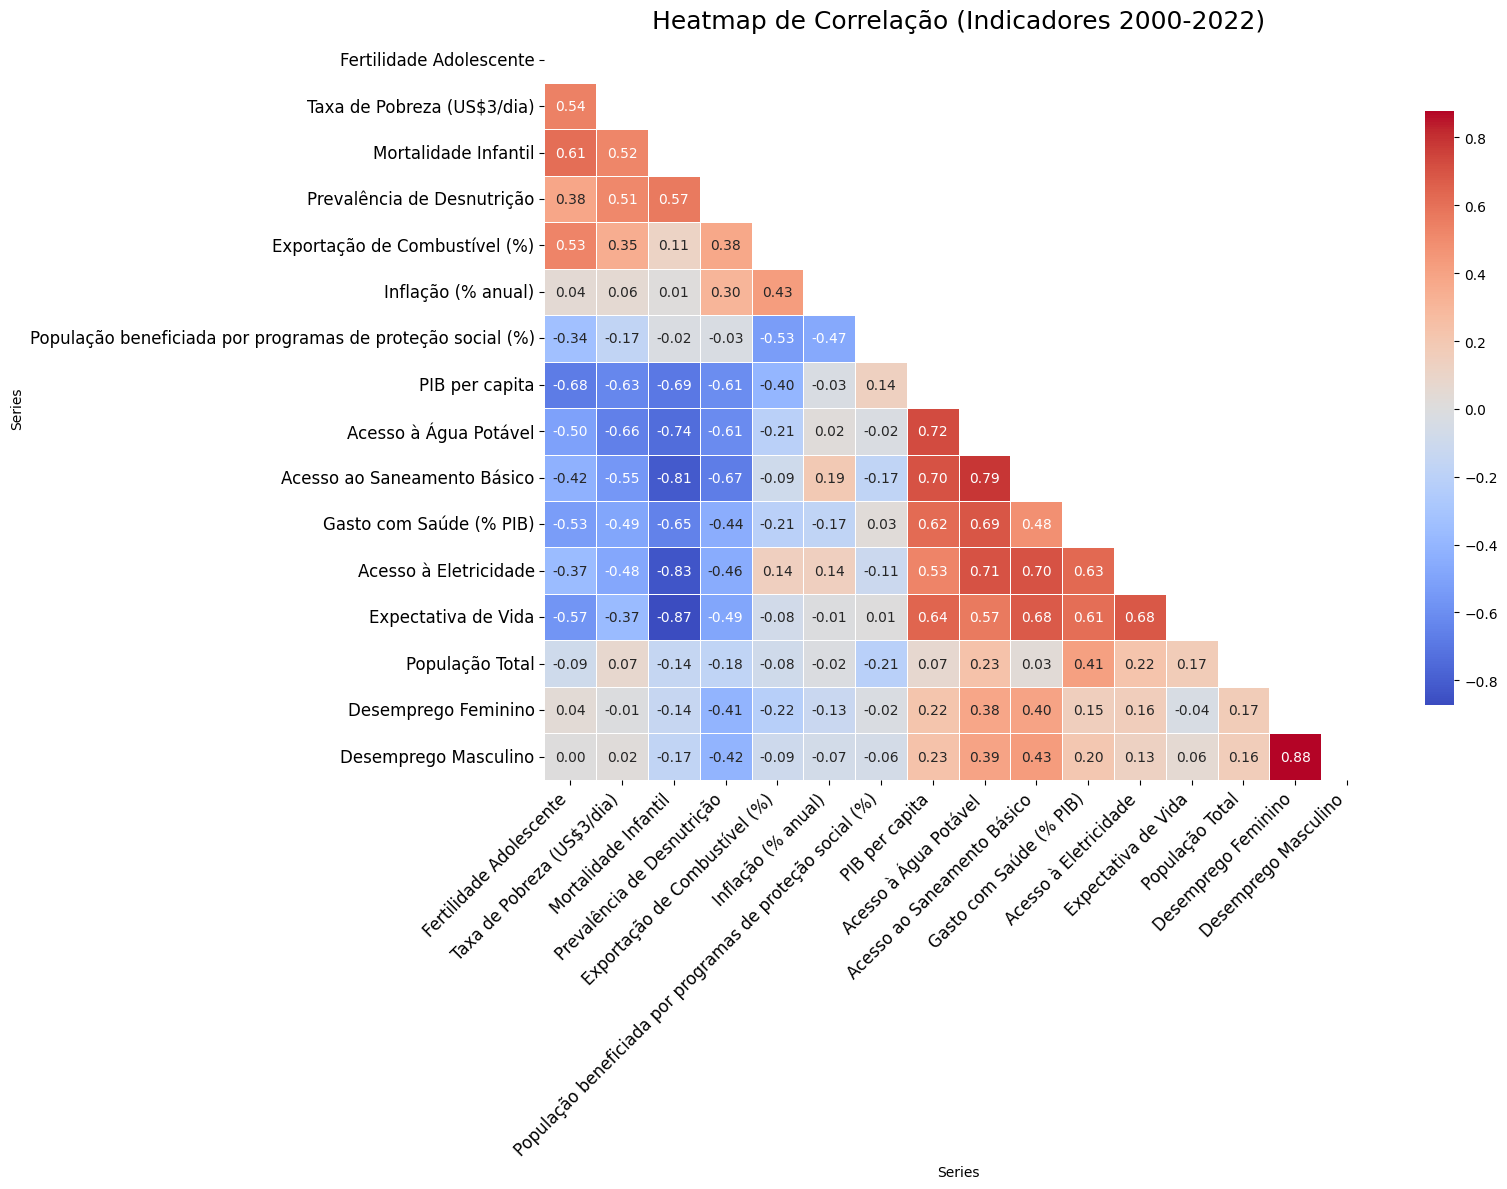

In [32]:
colunas_indicadores = df_data.columns.drop(['País', 'Ano', 'Decada', 'Crescimento_PIB_pc'])
df_plot = df_data[colunas_indicadores].rename(columns=mapa_nomes)

#calcula a correlação
corr = df_plot.corr()

#reordena a matriz de correlação por cluster (para agrupar visualmente)
linkage = hierarchy.linkage(corr, method='average', metric='euclidean')
dn = hierarchy.dendrogram(linkage, no_plot=True)
col_order = corr.columns[dn['leaves']]
corr_reordered = corr.loc[col_order, col_order]

#máscara para esconder o triângulo superior (informação redundante)
mask = np.triu(np.ones_like(corr_reordered, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_reordered,
    annot=True,          #add os números (coeficientes) em cada célula
    cmap='coolwarm',     #define a paleta de cores (azul=negativo, vermelho=positivo)
    fmt='.2f',           #formata os números para 2 casas decimais
    linewidths=.5,
    mask=mask,
    cbar_kws={"shrink": .8}
)

plt.title('Heatmap de Correlação (Indicadores 2000-2022)', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.savefig('../../reports/figures/heatmap_relacao.png', bbox_inches='tight')
plt.tight_layout()

## 2.7. Conclusão

Com a análise exploratória concluída, temos um entendimento profundo da estrutura socioeconômica dos 12 países sul-americanos no período de 2000 a 2022. Identificamos padrões claros, como a desigualdade regional nos níveis de riqueza e nos investimentos em saúde, além de tendências importantes, como a redução geral da mortalidade infantil.

A principal descoberta, no entanto, foi a identificação de uma forte anomalia nos dados da Guiana. Os boxplots e o heatmap de correlação revelaram uma mudança estrutural repentina, onde o PIB per capita e as Exportações de Combustíveis, ambos historicamente estáveis e baixos, disparam em anos recentes.

Esta descoberta levanta a questão central que guiará nossa próxima etapa. A seção seguinte, de Visualização de Dados, será focada em analisar a fundo essa anomalia para responder o que causou essa mudança drástica na economia da Guiana e qual seu impacto no cenário regional.

# 3. Visualização de Dados

## 3.1. Pergunta 1: Como a expectativa de vida evoluiu em países da América do Sul de 2000 a 2022?

A expectativa de vida é um dos indicadores sintéticos mais importantes da qualidade de vida, refletindo avanços em medicina, saneamento, nutrição e segurança pública. O gráfico permite uma comparação direta da trajetória de diferentes nações.

- Hipótese: evolução crescente com impacto vigente no período pandemico.
- Propósito: evidenciar o desenvolvimento social e de saúde na América do Sul, mostrando como, de 2000 a 2019, todos os países conseguiram aumentar consistentemente a longevidade de suas populações.

O gráfico mostra uma tendência ascendente inequívoca para todos os países nas primeiras duas décadas. O ponto mais crítico da análise é a queda acentuada e universal na expectativa de vida em todos os países por volta de 2020. No entanto, a maioria das linhas mostra um "V" acentuado, indicando que, com o arrefecimento da pandemia (vacinação, etc.), a expectativa de vida começou a se recuperar em 2022, embora muitos países ainda estivessem abaixo de seus picos de 2019.

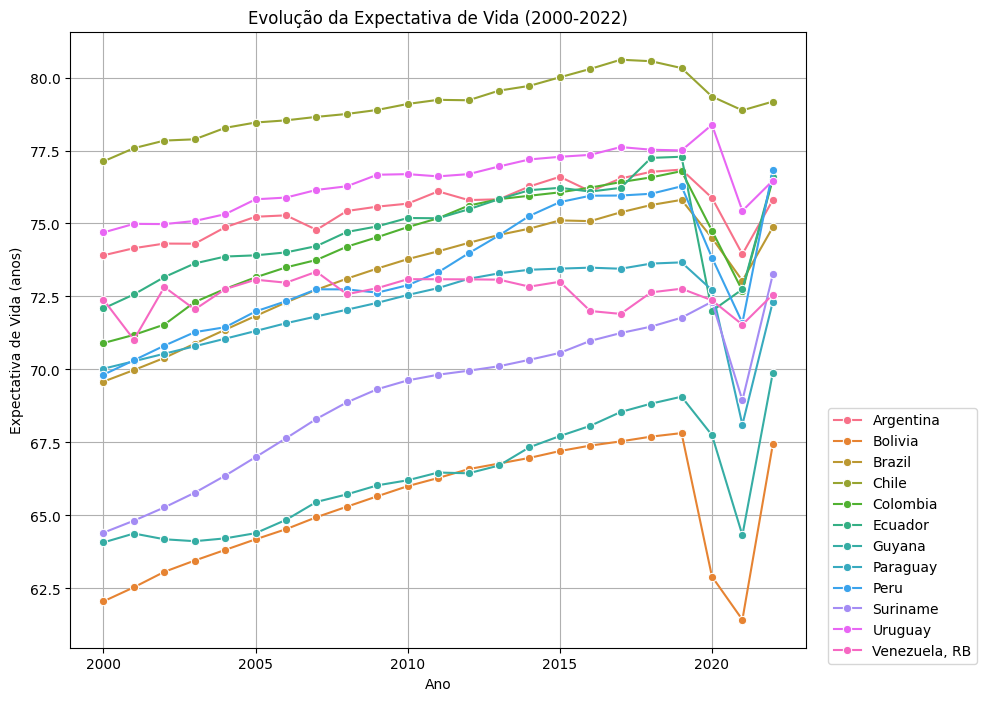

In [33]:
plt.figure(figsize=(9.5, 8))
plt.title('Evolução da Expectativa de Vida (2000-2022)')
sns.lineplot(
    x='Ano', 
    y='Expectativa de Vida', 
    hue='País', 
    data=df_data, 
    marker='o'
)
plt.ylabel('Expectativa de Vida (anos)')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.02, 0.4), loc='upper left')
plt.savefig('../../reports/figures/evolucao_expectativa_de_vida.png', bbox_inches='tight')
plt.show()

## 3.2. Pergunta 2: Qual a relação entre o desenvolvimento de infraestrutura básica (saneamento, água potável, eletricidade) e a taxa de mortalidade infantil em países da América do Sul?

No heatmap de correlações entre os indicadores, a taxa de mortalidade infantil apresenta correlações negativas altíssimas com indicadores de infraestrutura como Acesso ao Saneamento Básico (-0,81), Acesso à Água Potável (-0,74) e Acesso à Eletricidade (-0,83). Ou seja enquanto um sobe (mortalidade por ex.) o outro desce (infraestrutura).

- Hipótese: países com menor taxa de mortalidade investem em infraestrutura.
- Propósito: impacto social e financeiro direto, ajudando a justificar onde os investimentos públicos podem trazer mais benefícios pra saúde da população.

A tendência visual em todos os três gráficos é inegável: os pontos formam uma curva que desce da esquerda para a direita. Isso indica que à medida que o acesso à infraestrutura (Saneamento, Água ou Eletricidade) aumenta, a taxa de Mortalidade Infantil diminui.

Portanto, a visualização valida a hipótese de que o investimento em saneamento, água potável e eletricidade está fortemente associado a melhorias drásticas nos indicadores de saúde pública, servindo como uma ferramenta poderosa para justificar a alocação de investimentos públicos nessas áreas.

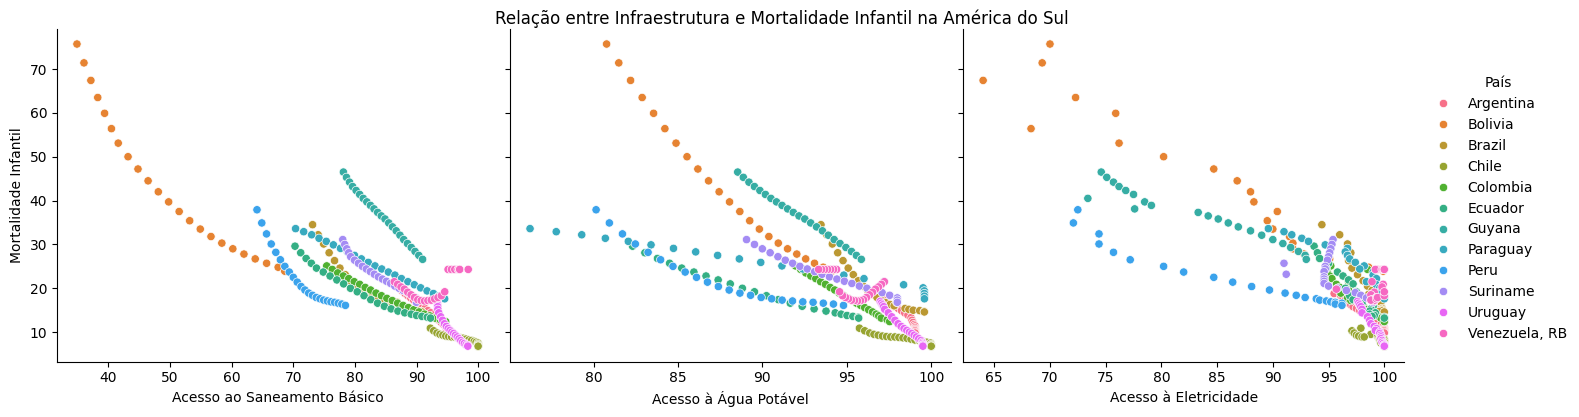

In [34]:
colunas = [ 
    'Acesso ao Saneamento Básico', 
    'Acesso à Água Potável', 
    'Acesso à Eletricidade'
]

df_plot = df_data.rename(columns=mapa_nomes) 

sns.pairplot(df_plot, x_vars=colunas, y_vars=['Mortalidade Infantil'], hue='País', height=4, aspect=1.2)
plt.suptitle('Relação entre Infraestrutura e Mortalidade Infantil na América do Sul', y=1.02)
plt.savefig('../../reports/figures/infraestrutura_e_mortalidade_infantil.png', bbox_inches='tight')
plt.show()

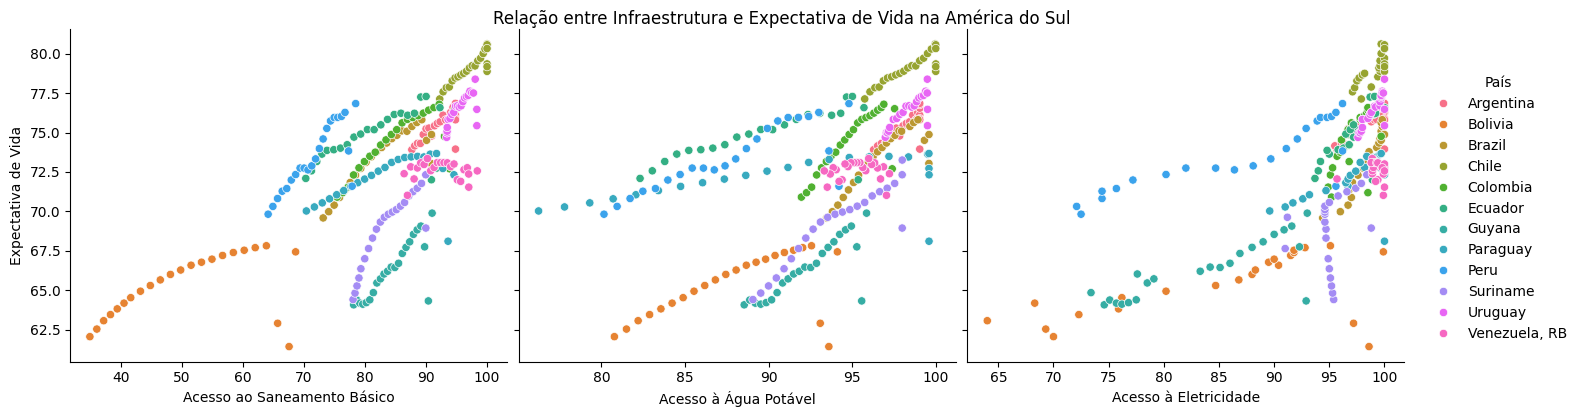

In [35]:
colunas = [ 
    'Acesso ao Saneamento Básico', 
    'Acesso à Água Potável', 
    'Acesso à Eletricidade'
]

df_plot = df_data.rename(columns=mapa_nomes) 

sns.pairplot(df_plot, x_vars=colunas, y_vars=['Expectativa de Vida'], hue='País', height=4, aspect=1.2)
plt.suptitle('Relação entre Infraestrutura e Expectativa de Vida na América do Sul', y=1.02)
plt.savefig('../../reports/figures/infraestrutura_expectativa_de_vida.png', bbox_inches='tight')
plt.show()

## 3.3. Pergunta 3: Como se explica a anomalia da taxa de pobreza brasileira em 2020, que apresentou uma queda significativa durante o auge da pandemia, enquanto outros países sul-americanos registraram um aumento?

No conjunto de gráficos "Taxa de pobreza na América do Sul (2012-2022)", notamos que, diferente da maioria dos demais países da América do Sul, que aumentam significativamente a taxa de pobreza de sua população no ano de 2020, o Brasil faz o caminho oposto e registra a menor taxa de pobreza registrada, pelo menos entre 2012 e 2022.

No gráfico de eixo duplo "Brasil (2012-2022): Proteção Social x Taxa de Pobreza", observa-se uma correlação negativa (inversa) muito forte e atípica especificamente em 2020. Enquanto a "População beneficiada por programas de proteção social (%)" (linha verde-pontilhada) dispara para seu pico histórico, a "Taxa de Pobreza" (linha azul) apresenta uma queda abrupta no mesmo período, atingindo a mínima da década.

- Hipótese: A queda anômala da pobreza em 2020 foi um resultado direto da implementação de programas massivos de transferência de renda (como o Auxílio Emergencial), que superaram temporariamente a perda de renda da população causada pela crise sanitária.

- Propósito: Analisar o impacto imediato e a eficácia de políticas públicas de assistência social em larga escala como ferramenta principal de contenção dos efeitos econômicos de uma crise aguda.

A tendência visual nos gráficos "Taxa de Pobreza na América do Sul" (linha verde) e nos "Rankings de 2019, 2020, 2021" (barras) confirma essa anomalia. O Brasil é o único país que apresenta uma redução expressiva da pobreza em 2020, enquanto os vizinhos, em sua maioria, registraram um aumento, como era o esperado para o cenário.

Portanto, a visualização valida a hipótese de que a queda na pobreza em 2020 não foi estrutural, mas sim um resultado direto da injeção de capital via proteção social. A política de auxílio foi eficaz em, momentaneamente, reverter o indicador de pobreza, mesmo em um cenário econômico adverso.

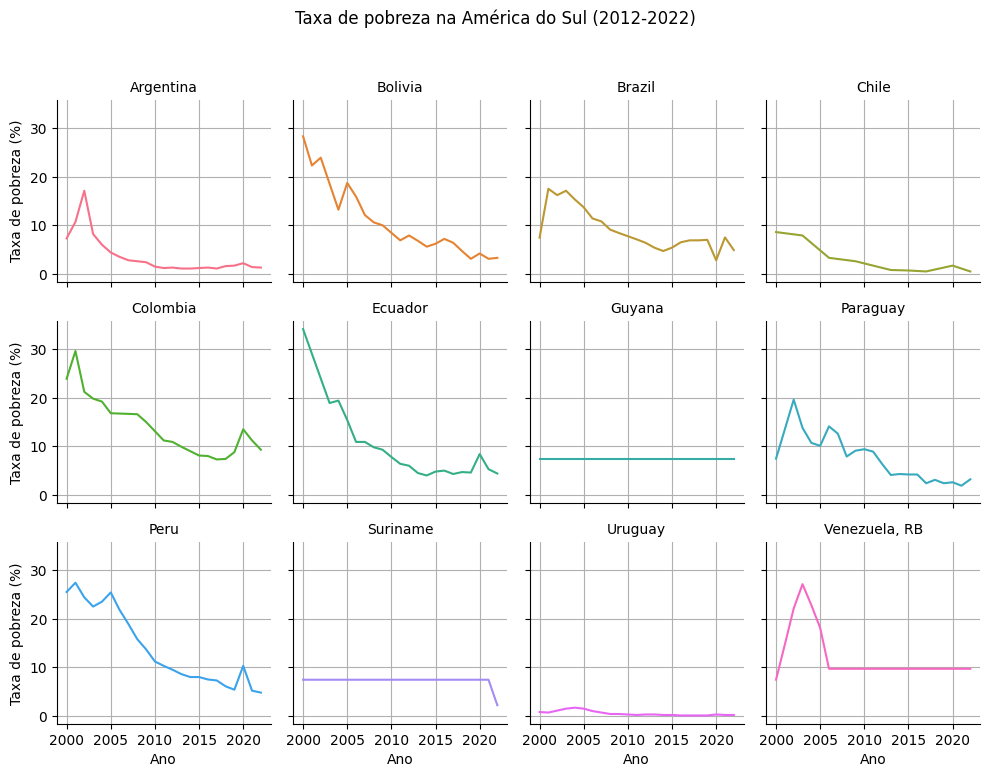

In [36]:
g = sns.relplot(
    data=df_data,
    x='Ano',
    y='Taxa de Pobreza (US$3/dia)',
    hue='País',       
    col='País',          
    col_wrap=4,           
    kind='line',
    height=2.5,
    aspect=1,
    legend= False
)

g.fig.suptitle('Taxa de pobreza na América do Sul (2012-2022)', y=1.03) , g.set_axis_labels('Ano', 'Taxa de pobreza (%)'), g.set_titles('{col_name}')   

for ax in g.axes.flat:
    ax.grid(True)
    
    plt.tight_layout()
plt.savefig('../../reports/figures/taxa_de_pobreza_por_pais.png', bbox_inches='tight')
plt.show()


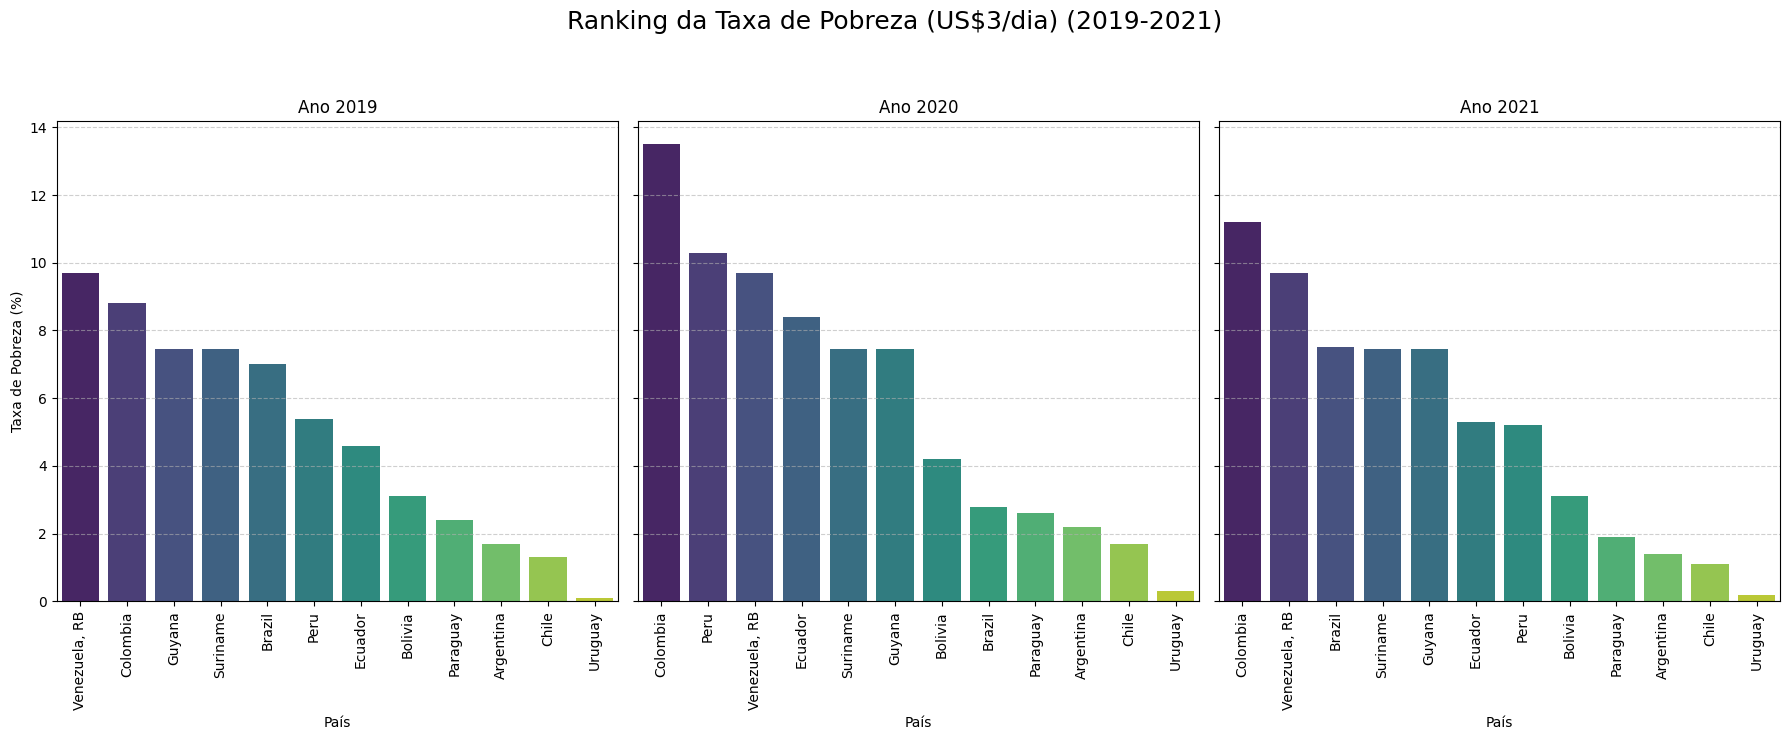

In [37]:
ano_1 = 2019
ano_2 = 2020
ano_3 = 2021
metrica = 'Taxa de Pobreza (US$3/dia)'

df_2019 = df_data[df_data['Ano'] == ano_1].sort_values(by=metrica, ascending=False)
df_2020 = df_data[df_data['Ano'] == ano_2].sort_values(by=metrica, ascending=False)
df_2021 = df_data[df_data['Ano'] == ano_3].sort_values(by=metrica, ascending=False)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 7), sharey=True)
fig.suptitle(f'Ranking da {metrica} (2019-2021)', fontsize=18, y=1.05)

sns.barplot(data=df_2019, x='País', y=metrica, ax=ax1, palette='viridis', hue='País')
ax1.set_title(f'Ano {ano_1}'), ax1.set_xlabel('País'), ax1.set_ylabel('Taxa de Pobreza (%)'), ax1.tick_params(axis='x', rotation=90) 
ax1.grid(True, linestyle='--', alpha=0.6, axis='y')

sns.barplot(data=df_2020, x='País', y=metrica, ax=ax2, palette='viridis', hue='País')
ax2.set_title(f'Ano {ano_2}'), ax2.set_xlabel('País'), ax2.set_ylabel('') , ax2.tick_params(axis='x', rotation=90) 
ax2.grid(True, linestyle='--', alpha=0.6, axis='y') 

sns.barplot(data=df_2021, x='País', y=metrica, ax=ax3, palette='viridis', hue='País')
ax3.set_title(f'Ano {ano_3}'), ax3.set_xlabel('País'), ax3.set_ylabel('') , ax3.tick_params(axis='x', rotation=90) 
ax3.grid(True, linestyle='--', alpha=0.6, axis='y') 

plt.tight_layout()
plt.savefig('../../reports/figures/comparacao_pobreza_2019_2021.png', bbox_inches='tight')
plt.show()

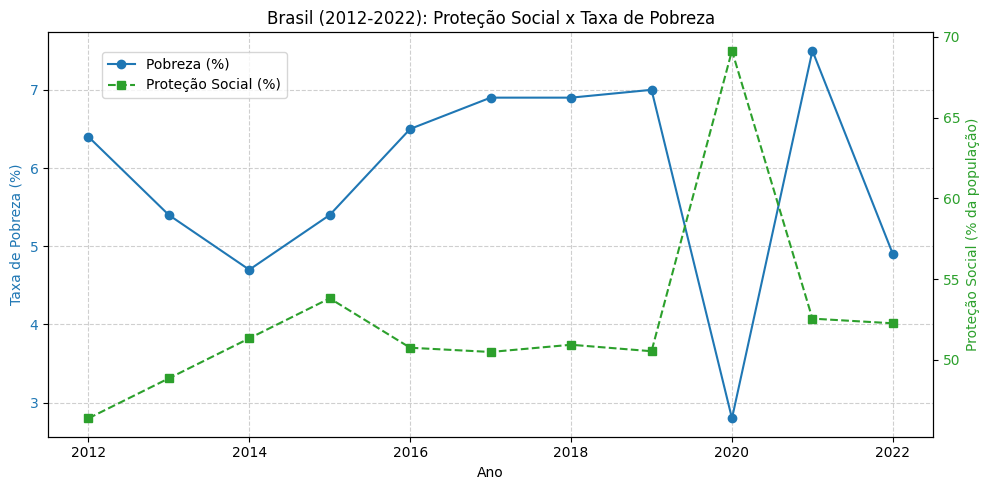

In [38]:
df_brasil = df_data[
    (df_data['País'] == 'Brazil') & 
    (df_data['Ano'].between(2012, 2022))
].copy()

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Taxa de Pobreza (%)', color=color)
ax1.plot(df_brasil['Ano'], df_brasil['Taxa de Pobreza (US$3/dia)'], color=color, marker='o', label='Pobreza (%)')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:green'
ax2.set_ylabel('Proteção Social (% da população)', color=color)  
ax2.plot(df_brasil['Ano'], df_brasil['População beneficiada por programas de proteção social (%)'], color=color, marker='s', linestyle='--', label='Proteção Social (%)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Brasil (2012-2022): Proteção Social x Taxa de Pobreza')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

ax1.grid(True, linestyle='--', alpha=0.6)

fig.tight_layout()  
plt.savefig('../../reports/figures/brasil_pobreza_protecao_dualaxis.png', bbox_inches='tight')
plt.show()

## 3.4. Pergunta 4: O que explica a reversão abrupta na taxa de pobreza do Brasil, que, após atingir a mínima da década em 2020, registrou a máxima histórica do período em 2021?

Ainda no gráfico "Brasil (2012-2022): Proteção Social x Taxa de Pobreza", a forte correlação inversa se mantém em 2021. A linha de "População beneficiada" (verde-pontilhada) sofre uma redução notória após o pico de 2020. Simultaneamente, a "Taxa de Pobreza" (azul) dispara, atingindo o ponto mais alto de todo o período analisado.


- Hipótese: A alta na taxa de pobreza em 2021 foi um "efeito rebote" causado pela interrupção ou redução abrupta dos programas de transferência de renda que sustentavam a população vulnerável no ano anterior.

- Propósito: Demonstrar a importância da continuidade e de estratégias de transição ("rampa de saída") para investimentos sociais, evidenciando os riscos de uma retirada abrupta do suporte financeiro em um cenário pós-crise.

A tendência visual no gráfico de eixo duplo (Pobreza x Proteção) é clara. Além disso, o gráfico "Brasil: Pobreza vs. Inflação" mostra que, em 2021, a alta da pobreza (azul) também ocorreu em paralelo a uma alta significativa da "Inflação (% anual)" (vermelha). Isso sugere que a perda do auxílio coincidiu com um aumento no custo de vida, intensificando o efeito negativo sobre a população.

Portanto, a visualização valida a hipótese de que a população que saiu da pobreza em 2020 estava em situação precária. A retirada do suporte financeiro, sem uma política de transição eficaz e em um cenário inflacionário, gerou um severo efeito rebote que empurrou a taxa de pobreza para um nível superior ao pré-pandêmico.

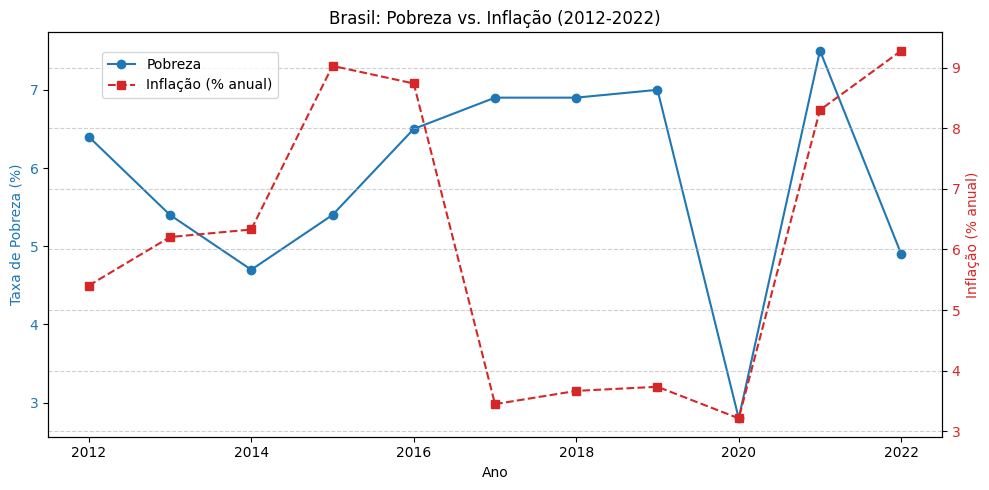

In [39]:
df_brasil = df_data[
    (df_data['País'] == 'Brazil') & 
    (df_data['Ano'].between(2012, 2022))
].copy()

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Ano')
ax1.set_ylabel('Taxa de Pobreza (%)', color=color)
ax1.plot(df_brasil['Ano'], df_brasil['Taxa de Pobreza (US$3/dia)'], color=color, marker='o', label='Pobreza')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Inflação (% anual)', color=color)  
ax2.plot(df_brasil['Ano'], df_brasil['Inflação (% anual)'], color=color, marker='s', linestyle='--', label='Inflação (% anual)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Brasil: Pobreza vs. Inflação (2012-2022)')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.grid(True, linestyle='--', alpha=0.6) 
fig.tight_layout()  
plt.savefig('../../reports/figures/brasil_pobreza_inflacao_dualaxis.png', bbox_inches='tight')
plt.show()

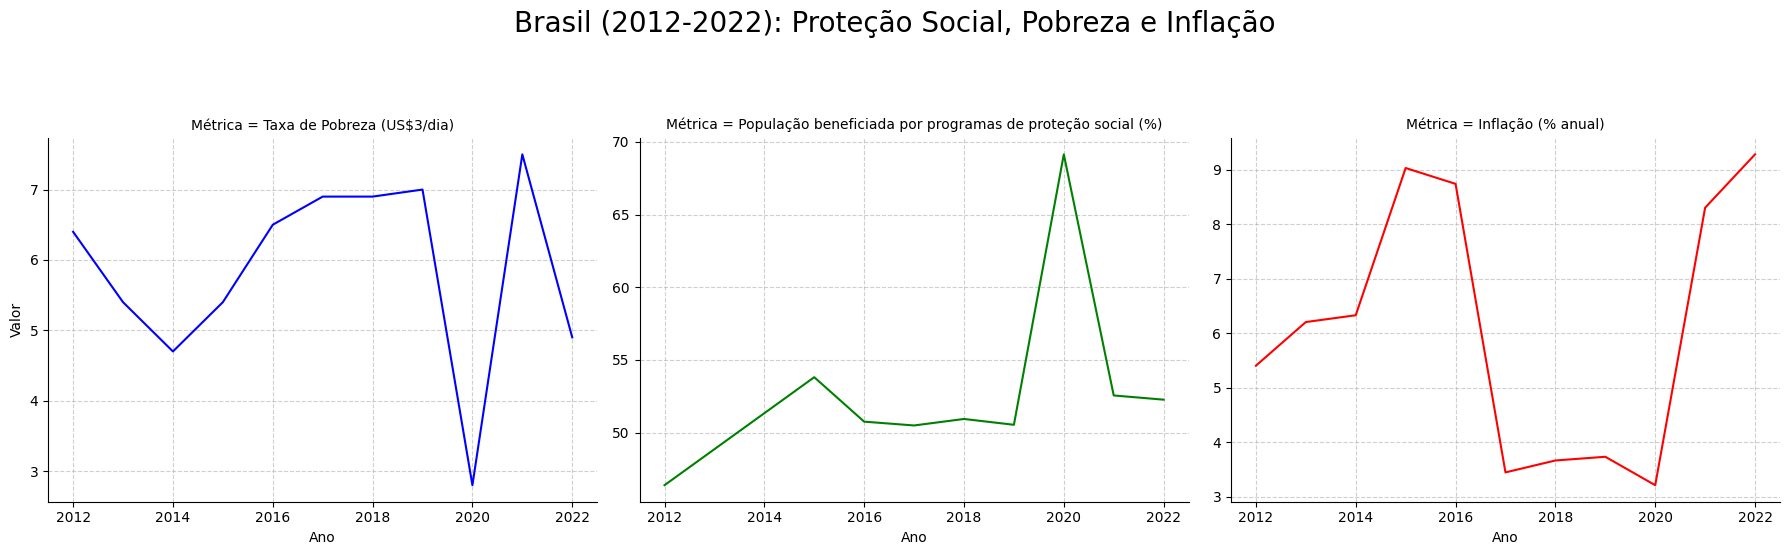

In [40]:
color_palette_map = {
    'Taxa de Pobreza (US$3/dia)': 'blue',
    'População beneficiada por programas de proteção social (%)': 'green',
    'Inflação (% anual)': 'red'
}

df_long['Métrica'] = df_long['Series'].map(mapa_nomes)

df_plot = df_long[
    (df_long['Country'] == 'Brazil') &
    (df_long['Ano'].between(2012, 2022)) &
    (df_long['Métrica'].isin(list(color_palette_map.keys()))) 
]

g = sns.relplot(
    data=df_plot,
    x='Ano',
    y='Valor',
    col='Métrica',
    hue='Métrica',           
    palette=color_palette_map, 
    kind='line',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': False},
    legend= False
)

for ax in g.axes.flatten():
    ax.grid(True, linestyle='--', alpha=0.6)

g.fig.suptitle('Brasil (2012-2022): Proteção Social, Pobreza e Inflação', y=1.1, fontsize=20)
plt.tight_layout()
plt.savefig('../../reports/figures/analise_brasil_ppi_colorido_default_titles.png', bbox_inches='tight')
plt.show()

## 3.5. Pergunta 5: O que causou o avanço no PIB da Guiana?

* Hipótese: Esse avanço não é uma coincidência, mas um resultado direto do ínicio da exportação de combustíveis.
* Propósito: Essa casualidade é importante, pois: para investidores, sinaliza um novo mercado de alto crescimento na região e para economistas, a Guiana se tornará um estudo de caso em tempo real sobre como o país lidará com a dependência de um único recurso e como o seu crescimento se desenrolará com o passar dos anos.
* Visualização Gráfico de dipersão (Scatter Plot), para primeiramente provar correlação.

O gráfico de regressão prova que existe uma correlação positiva quase perfeita (R = 0.9352) entre as duas variáveis.

Estatiscamente, a correlação por si só não prova a causalidade, pois pode existir um terceiro fator que esteja ocasionando no impulso de PIB per capita e exportações de combustíveis, porém, o contexto externo nos fornece o veredito final:
1. Em 2015 foram encontradas reservas de petróleo gigantescas na costa da Guiana.
2. Em 2019 a produção e exportação desse petróleo tiveram início no final de 2019.

Conclusão: Nossos gráficos capturaram esse evento em tempo real. O grupo de pontos à esquerda, em 0%, representa a economia pré-petróleo da Guiana. Os três outros pontos (2020, 2021 e 2022) representam a nova economia pós-petróleo.

Portanto, a correlação altíssima, combinada com a evidência externa, nos permite concluir que o avanço no PIB per capita da Guiana foi, de fato, causado pelo início das exportações de combustíveis (petróleo).

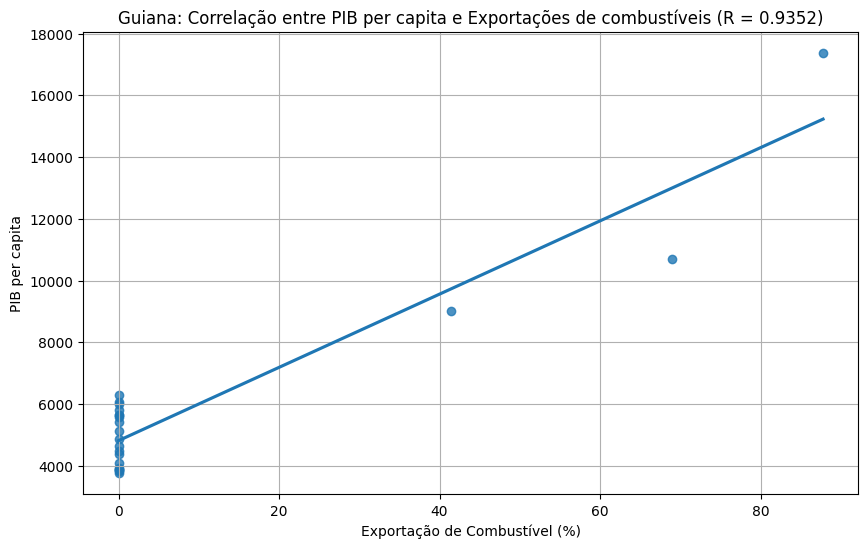

In [41]:
# Filtrar os dados apenas para Guiana
df_guyana = df_data[df_data['País'] == 'Guyana']

# Calcular o coeficiente de correlação (R de Pearson)
corr, _ = pearsonr(df_guyana['Exportação de Combustível (%)'], df_guyana['PIB per capita'])

# 3. Criar o Gráfico de Regressão
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_guyana, 
    x='Exportação de Combustível (%)', 
    y='PIB per capita',
    ci=None
)

plt.title(f'Guiana: Correlação entre PIB per capita e Exportações de combustíveis (R = {corr:.4f})')
plt.xlabel('Exportação de Combustível (%)')
plt.ylabel('PIB per capita')
plt.grid(True)
plt.show()

## 3.6. Pergunta 6: Qual o impacto do "boom" da Guiana no ranking regional?

* Propósito: Provar que o crescimento da Guiana reorganizou o ranking econômico da América do Sul em apenas 3 anos.
* Visualização: Gráficos de barras lado a lado, comparando o antes (2019) e o depois (2022).

Conclusão: 
* No ranking de 2019 a Guiana era um país de baixa renda, com o 4° menor PIB per capita da região.
* No ranking de 2022 a Guiana salta para a 2° posição dos países de maior PIB per capita da região, ficando atrás apenas do Uruguai.

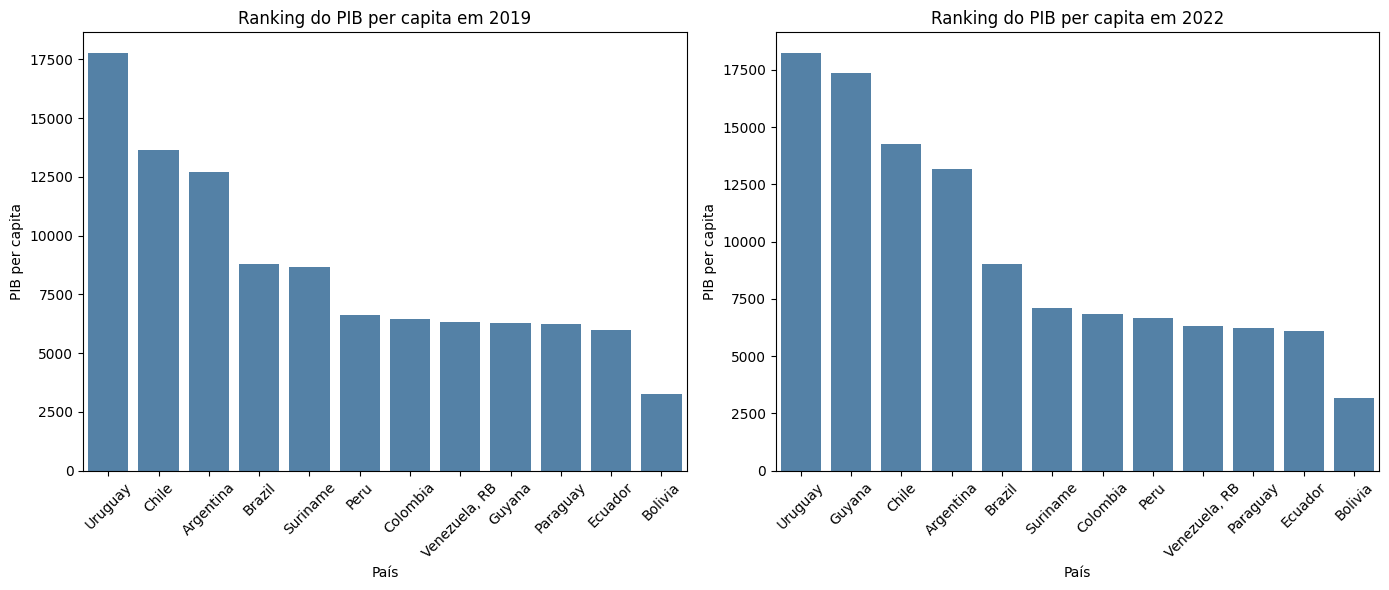

In [42]:
ano_antes = 2019
ano_depois = 2022

# Filtra e ordena os dados
df_antes = df_data[df_data['Ano'] == ano_antes].sort_values(by='PIB per capita', ascending=False)
df_depois = df_data[df_data['Ano'] == ano_depois].sort_values(by='PIB per capita', ascending=False)

# Criação de uma fígura com 1 linha e 2 colunas 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plotar o ranking de 2019 na 1° coluna
sns.barplot(data=df_antes, x='País', y='PIB per capita', ax=ax1, color='steelblue')
ax1.set_title(f'Ranking do PIB per capita em {ano_antes}')
ax1.tick_params(axis='x', rotation=45)

# Plotar o ranking de 2022 na 2° coluna
sns.barplot(data=df_depois, x='País', y='PIB per capita', ax=ax2, color='steelblue')
ax2.set_title(f'Ranking do PIB per capita em {ano_depois}')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()